C:\Users\HRISHITHA\AppData\Local\Temp\ipykernel_26088\3573431291.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = scaler.fit_transform(X[num_cols])
C:\Users\HRISHITHA\AppData\Local\Temp\ipykernel_26088\3573431291.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols] = scaler.transform(X_test[num_cols])


Mean Squared Error (MSE): 1216511107.8199592
Root Mean Squared Error (RMSE): 34878.51928938439
R^2 Score: 0.8414003427024938


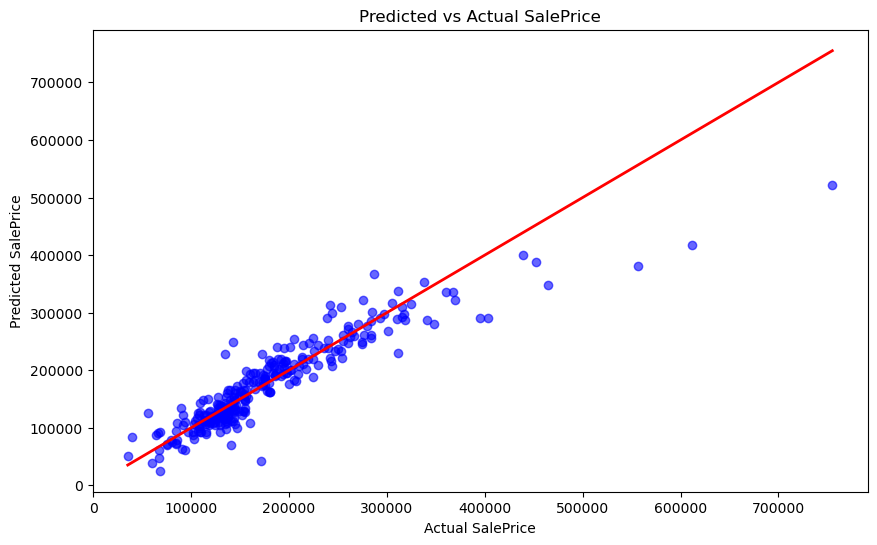

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Loading data
train_df = pd.read_csv(r"C:\Users\HRISHITHA\OneDrive\Desktop\SKILLCRAFT\PROJECT_01\train.csv")
test_df = pd.read_csv(r"C:\Users\HRISHITHA\OneDrive\Desktop\SKILLCRAFT\PROJECT_01\test.csv")

# preprocess
train_df.columns = train_df.columns.str.strip()
test_df.columns = test_df.columns.str.strip()

X = train_df.drop(columns=['SalePrice', 'Id'])  
y = train_df['SalePrice']  
test_ids = test_df['Id']  
X_test = test_df.drop(columns=['Id'])  
combined_df = pd.concat([X, X_test], axis=0)
combined_df.fillna(combined_df.median(numeric_only=True), inplace=True) 
combined_df.fillna('None', inplace=True)
cat_cols = combined_df.select_dtypes(include='object').columns  #categorical columns
label_encoders = {}  
for col in cat_cols:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

X = combined_df.iloc[:len(X), :]  
X_test = combined_df.iloc[len(X):, :] 

scaler = StandardScaler()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns  
X[num_cols] = scaler.fit_transform(X[num_cols]) 
X_test[num_cols] = scaler.transform(X_test[num_cols]) 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_val, y_val_pred)


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

y_test_pred = model.predict(X_test)

submission = pd.DataFrame({'Id': test_ids, 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', lw=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Predicted vs Actual SalePrice')
plt.show()